# Symmetric Encryption Lab
Symmetric cryptography, also known as shared-key cryptography, is a method of encryption and decryption that uses the same secret key for both processes. 

When performing symmetric encryption, there are a lot of options, each with different results. In this lab we'll look at the effect of different ciphers and modes of operation on the ciphertext. We'll also look at key derivation functions, padding and error propagation.

This lab will run on the bash kernel and we will rely on openssl for most of the work.

Locate the "USD_logo.bmp" file and copy into to a working directory for the encrypted images you'll be generating.

First, let's check the version of openssl we are using. Type:

`openssl version`

In [46]:
!openssl version # remember to use the ! character to execute linux commands in jupyter labs

OpenSSL 3.0.2 15 Mar 2022 (Library: OpenSSL 3.0.2 15 Mar 2022)


to see a list of all available ciphers type:

`openssl enc -list`

In [47]:
!openssl enc -list

Supported ciphers:
-aes-128-cbc               -aes-128-cfb               -aes-128-cfb1             
-aes-128-cfb8              -aes-128-ctr               -aes-128-ecb              
-aes-128-ofb               -aes-192-cbc               -aes-192-cfb              
-aes-192-cfb1              -aes-192-cfb8              -aes-192-ctr              
-aes-192-ecb               -aes-192-ofb               -aes-256-cbc              
-aes-256-cfb               -aes-256-cfb1              -aes-256-cfb8             
-aes-256-ctr               -aes-256-ecb               -aes-256-ofb              
-aes128                    -aes128-wrap               -aes192                   
-aes192-wrap               -aes256                    -aes256-wrap              
-aria-128-cbc              -aria-128-cfb              -aria-128-cfb1            
-aria-128-cfb8             -aria-128-ctr              -aria-128-ecb             
-aria-128-ofb              -aria-192-cbc              -aria-192-cfb             
-aria-192

For this lab, we'll start with AES-128-CBC

Before we can start encrypting, we need something to encrypt. You can create your plaintext using an editor or use the code model in the code cell below to create your file. Change the "..." to your message. Make sure you use at least 100 characters.

`echo "..." > plain.txt`



In [48]:
!echo "This is my plain text for my CYBR504 class" > plain.txt 
!cat plain.txt

This is my plain text for my CYBR504 class


Now, let's encrypt your secret message using AES-128-CBC.  

We'll use the openssl command to encrypt the file:

`openssl <cipher> -e -in plain.txt -out cipher.txt -K <key> -iv <iv>`

You'll need to replace \<cipher\> with the cipher to use. We're using AES-128-CBC, so use "aes-128-cbc" as the cipher.
    
For CBC mode you'll also need both a key and an intialization vector. These should be random (i.e, unguessable). Let's generate those.

We can use the random number functions of openssl to generate these. Because the encryption command expects these in hex format we'll use the -hex option

`openssl rand -hex <number of bytes>`
    
If we are using a 128-bit key size, how many bytes is that?
    
In the code cell below, run your openssl command to generate the random value. Run it a few times, just to see how it changes.

In [49]:
# !openssl enc -aes-128-cbc -e -in plain.txt -out cipher.txt -K $(openssl rand -hex 16) -iv $(openssl rand -hex 16)

print('If we are using a 128-bit key size, we are using 16 bytes')
print()
print('My generated random values:')
!openssl rand -hex 16
!openssl rand -hex 16
!openssl rand -hex 16
!openssl rand -hex 16

If we are using a 128-bit key size, we are using 16 bytes

My generated random values:
76d654eccc066acb5cd3149174b13d61
ec5d86b8262e75ce7e0acdb4e225c2f6
22fc309892a08e3441f74017f18dd680
1db4ea422216ac5420cdf69cc2eaceaa


We could just cut and paste the random values into the openssl command to do the encryption, but let's look at a bash shell trick.

We can send the output of the command to an variable we can use later. Try running the following in a code cell.

``` myKey=$(openssl rand -hex 16)
echo $myKey ```

In [50]:
# !myKey=$(openssl rand -hex 16) && echo $myKey # ISSUE

In [51]:
# !myIV=$(openssl rand -hex 16) && echo $myIV # ISSUE

In [52]:
import subprocess

# there were some issues using the bash linux prompt
# use python here to store the my_key variable
result = subprocess.run(["openssl", "rand", "-hex", "16"], capture_output=True, text=True)
my_key = result.stdout.strip()
print(my_key)

fdb794ef24ea06c2616158d3db1854a3


Do it again, but use myIV as the variable.

In [53]:
# use python to store the my_iv variable
result = subprocess.run(["openssl", "rand", "-hex", "16"], capture_output=True, text=True)
my_iv = result.stdout.strip()
print(my_iv)

3ec8434e29910ded1e204cf45ae2a93b


In [54]:
# !myIV=$(openssl rand -hex 16)
# !echo $myIV 

Let's use this to encrypt our plaintext. Use the command:
`openssl aes-128-cbc -e -in plain.txt -out cipher.txt -K $myKey -iv $myIV`

In [55]:
# ENCRYPT ACTION
!openssl aes-128-cbc -e -in plain.txt -out cipher.txt -K $my_key -iv $my_iv

In [56]:
"""
I was getting an "iv endefined error" using the example code.
It could be that the shell commands are running in different shell sessions.
To fix this, I ensure the '!myIV' variable is defined in the same subshell session by combining all the commands into a single line.
!bash commands are separated by semicilons;; and I only use the ! character one (1) time to initiate all three (3) bash commands.
"""

# !myKey=$(openssl rand -hex 16); myIV=$(openssl rand -hex 16); openssl aes-128-cbc -e -in plain.txt -out cipher.txt -K $myKey -iv $myIV

'\nI was getting an "iv endefined error" using the example code.\nIt could be that the shell commands are running in different shell sessions.\nTo fix this, I ensure the \'!myIV\' variable is defined in the same subshell session by combining all the commands into a single line.\n!bash commands are separated by semicilons;; and I only use the ! character one (1) time to initiate all three (3) bash commands.\n'

look at the ciphertext

In [57]:
cat cipher.txt

���_��F��{KF�ơev���<���XnNIp�3�Ys��tRG

Now try looking it in hex format.

In [58]:
cat cipher.txt | hexdump -C

00000000  e9 82 f0 01 ec 10 5f 15  ef cd 46 ec 13 df 7b 4b  |......_...F...{K|
00000010  46 e9 c6 a1 65 76 d5 cf  ee 3c 81 aa ba 58 0f 6e  |F...ev...<...X.n|
00000020  1b 4e 49 1a 70 d0 33 81  59 73 f5 8c 74 52 47 1f  |.NI.p.3.Ys..tRG.|
00000030


Now decrypt the file. 
* use the same openssl command as before, but use -d for decrypt instead of -e,
* use 'decrypted.txt' as the output filename.

In [59]:
# openssl ...
# cat decrypted.txt

# DECRYPT ACTION
!openssl aes-128-cbc -d -in cipher.txt -out plain2.txt -K $my_key -iv $my_iv

# print the plain text
!cat plain2.txt

This is my plain text for my CYBR504 class


Next, verify that the decrypted output is the same as the original input. 

Use `diff -as <f1> <f2>` 

In [60]:
!diff -as plain.txt plain2.txt

Files plain.txt and plain2.txt are identical


---
## Key Derevation Functions

In the previous examples, we explicitly included the key and initializtion vector. Another way to do this is to use a key derivation function. These take a passphrase and extend it to the number of bits desired. Typically KDFs use a hash function of a specialized hash function for the task. Think about it. If you take a simple passphrase and hash it to 128-bits, that is a unique transormation based on the passphrase. We can use this when encrypting or decrypting with openssl.

If we change our encryption command to:

`openssl aes-128-cbc -e -in plain.txt -out cipher.txt -pbkdf2 -k my_passphrase -P`

In this case, PBKDF2 is the specified key derivation function.

openssl will automatically generate the key and IV needed. Try it in a code cell.

In [61]:
!cat plain.txt

This is my plain text for my CYBR504 class


In [62]:
!openssl aes-128-cbc -e -in plain.txt -out cipher.txt -pbkdf2 -k my_passphrase -P

salt=770AECA004E5AAFD
key=4D3E3389E5A8CCBD67A93A97C0738656
iv =55FD63570E333011226CB99BDC600D6C


In [63]:
!openssl aes-128-cbc -e -in plain.txt -out cipher.txt -pbkdf2 -k my_passphrase -P

salt=14F253860B9965DD
key=201DA7DDAEAF0F08577D20C5BA8CC76D
iv =05A71E339D9F01450022F93EFC79544F


In [64]:
# add this line -> Run the same command again with the same passphrase, but name your output 'cipher2.txt'
# !openssl aes-128-cbc -e -in plain.txt -out cipher2.txt -pbkdf2 -k my_passphrase -P

Run the same command again with the same passphrase, but name your output 'cipher2.txt', then compare the two files.

`diff -as cipher.txt cipher2.txt`

In [65]:
!diff -as cipher.txt cipher2.txt

Files cipher.txt and cipher2.txt are identical


The cipher texts should be different but they seem to be identical. 
This seems like an lab error (Matt Sutherland 3/16/23)

<div style="background-color:rgba(225,135,0,.85); color:black; font-weight:bold; padding:6px;">
Although you used the same plaintext file, and the same passphrase, why are they not the same?</div>

>If you need a hint, open a code cell and run `hexdump -C cipher.txt | head -n 4`

In his section, instead of explicitly stating a key an initialization vector, we used the PBKDF2 key derivation function. This generated these for us.

KDFs have the advantage the rather than recall a long, random key and IV, you can just use a passphrase and let a cryptographic algorithm expand it. The downside of KDFs is that they start with a relatively low entropy value. This can simplify finding the passphrase given the key. The KDF maps the passprase directlty to the key. One way to make this more secure is to use more "rounds". That is the output of the KDF is fed back into the KDF multiple times. This breaks the 1-to-1 connection between the passphrase and the key. The more rounds, the harder it is to recover the passphrase, but it is slower to generate the key. Typically, this is not a significant issue. But, depending on the application, may need optimization.

---
## Padding

Block ciphers require full blocks to operate. When the number of bytes of data to be encrypted is not an exact multiple of the block size, the data needs to be padded, that is extended, to fill the last block being encrypted. Different algorithms use different padding schemes. AES specifies the PCKS#5 standard.

First, create some ciphertext, shorter than a block. How big is a block in AES?

In [66]:
!echo -n "hello" | openssl aes-128-cbc -out pad_test.cbc -nosalt -pbkdf2 -k secret
!hexdump -C pad_test.cbc

00000000  01 11 72 42 a1 a8 bf 39  ef 62 2d 9f 14 04 68 34  |..rB...9.b-...h4|
00000010


Notice the length of the output is larger than the the input.

Let's decrypt it and look at the output

In [67]:
!openssl aes-128-cbc -d -in pad_test.cbc -nosalt -pbkdf2 -k secret | hexdump -C

00000000  68 65 6c 6c 6f                                    |hello|
00000005


Normally decryption strips the padding out. 

To see the padding, open a new code cell and rerun that command, but add the '-nopad' option to the openssl command

Try encrypting plaintext of different lengths and notice how the padding changes. You can use the model below. Open additional code cells as needed. 

In [68]:
!echo -n "hello my name is" | openssl aes-128-cbc -out pad_test.cbc -nosalt -pbkdf2 -k secret
!openssl aes-128-cbc -d -in pad_test.cbc -nosalt -pbkdf2 -k secret -nopad | hexdump -C

00000000  68 65 6c 6c 6f 20 6d 79  20 6e 61 6d 65 20 69 73  |hello my name is|
00000010  10 10 10 10 10 10 10 10  10 10 10 10 10 10 10 10  |................|
00000020


In [69]:
!echo -n "hello my name i" | openssl aes-128-cbc -out pad_test.cbc -nosalt -pbkdf2 -k secret
!openssl aes-128-cbc -d -in pad_test.cbc -nosalt -pbkdf2 -k secret -nopad | hexdump -C

00000000  68 65 6c 6c 6f 20 6d 79  20 6e 61 6d 65 20 69 01  |hello my name i.|
00000010


In [70]:
!echo -n "hello my name is matt but some people call me sudz4" | openssl aes-128-cbc -out pad_test.cbc -nosalt -pbkdf2 -k secret
!openssl aes-128-cbc -d -in pad_test.cbc -nosalt -pbkdf2 -k secret -nopad | hexdump -C

00000000  68 65 6c 6c 6f 20 6d 79  20 6e 61 6d 65 20 69 73  |hello my name is|
00000010  20 6d 61 74 74 20 62 75  74 20 73 6f 6d 65 20 70  | matt but some p|
00000020  65 6f 70 6c 65 20 63 61  6c 6c 20 6d 65 20 73 75  |eople call me su|
00000030  64 7a 34 0d 0d 0d 0d 0d  0d 0d 0d 0d 0d 0d 0d 0d  |dz4.............|
00000040


<div style="background-color:rgba(225,135,0,.85); color:black; font-weight:bold; padding:6px;">
Explain the differences. Why those specific values? <br>
What happens when you input 15 bytes? 16?

---
## Exploring Modes of Operation

Block ciphers encrypt the plaintext in fixed size blocks. The block size depends on the symmetric cipher chosen and a valid block size (in general the block size otions are limited by the cipher used). How successive blocks are encrypted depends on the "Mode of Operation". In this section we will explore different modes of operation.

In the previous examples we used CBC - Cipher Block Chaining. In CBC, the output of one block is used as the IV for the next block. Next we'll look at ECB - Electronic Code Book, where blocks are encrypted independly (possibly in parallel) using the same key.  We'll use the openssl command with a KDF.

We'll be using this USD logo in our examples.

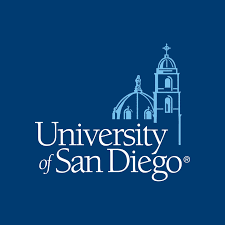

The first thing to do is encrypt it using AES-128-ECB.

In [71]:
!openssl aes-128-ecb -e -in USD_logo.bmp -out USD_logo.aes-ecb.bmp -nosalt -pbkdf2 -k secret
!ls -l USD_logo.aes-ecb.bmp 

-rw-rw-r-- 1 parallels parallels 52464 Mar 16 19:55 USD_logo.aes-ecb.bmp


This graphic file is now encrypted, but so is the .bmp format header. To make it a viewable file, copy the header from a valid .bmp file.

In [72]:
!dd  if=USD_logo.bmp of=USD_logo.aes-ecb.bmp bs=1 count=54 conv=notrunc

54+0 records in
54+0 records out
54 bytes copied, 0.000111537 s, 484 kB/s


Find the encrypted file and view using the image viewer. 
Copy and paste the file into a markdown cell, and run the cell to display the image.

{paste image in the cell below}

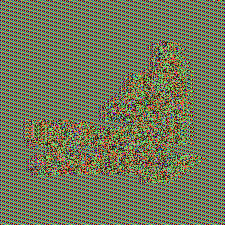

Now repeat the above, but use aes-128-cbc as the cipher. Save the encrypted file to a different name (USD_logo.aes-cbc.bmp), and fix the header using dd like you did before. Paste that image into a markdown window to display it.

In [79]:
# openssl ...
# dd ...

In [80]:
!openssl aes-128-cbc -e -in USD_logo.bmp -out USD_logo.aes-cbc.bmp -nosalt -pbkdf2 -k secret
!dd  if=USD_logo.bmp of=USD_logo.aes-cbc.bmp bs=1 count=54 conv=notrunc

54+0 records in
54+0 records out
54 bytes copied, 0.000114913 s, 470 kB/s


{paste image in next cell}

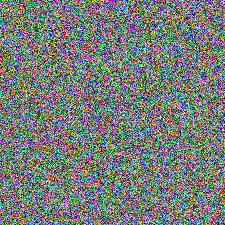

<div style="background-color:rgba(225,135,0,.85); color:black; font-weight:bold; padding:6px;">
Explain the difference between the two and why.

Now repeat the process using the Blowfish cipher:

`openssl enc -bf-ecb -in ./images/USD_logo.bmp -out ./images/USD_logo.bf-ecb.bmp -k foo -pbkdf2 -nosalt -provider legacy -provider default`

`dd  if=./images/USD_logo.bmp of=./images/USD_logo.bf-ecb.bmp bs=1 count=54 conv=notrunc`


In [82]:
!openssl enc -bf-ecb -in USD_logo.bmp -out USD_logo.bf-ecb.bmp -k foo -pbkdf2 -nosalt -provider legacy -provider default

!dd  if=USD_logo.bmp of=USD_logo.bf-ecb.bmp bs=1 count=54 conv=notrunc


54+0 records in
54+0 records out
54 bytes copied, 0.000106248 s, 508 kB/s


{paste image in the cell below}

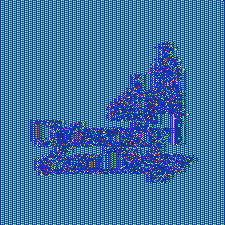

<div style="background-color:rgba(225,135,0,.85); color:black; font-weight:bold; padding:6px;">
Compare the image encrypted with AES to that of Blowfish. Notice that more information is leaked using Blowfish. Why is that?

Now lets look at the file sizes generated using different modes of operation.

Run the following cells then look at the resulting file sizes.

In [84]:
!openssl aes-128-ecb -e -in USD_logo.bmp -out USD_logo.x-ecb.bmp -pbkdf2 -k secret -nosalt

In [85]:
!openssl aes-128-cbc -e -in USD_logo.bmp -out USD_logo.x-cbc.bmp -pbkdf2 -k secret -nosalt

In [86]:
!openssl aes-128-ofb -e -in USD_logo.bmp -out USD_logo.x-ofb.bmp -pbkdf2 -k secret -nosalt

In [87]:
!openssl aes-128-cfb -e -in USD_logo.bmp -out USD_logo.x-cfb.bmp -pbkdf2 -k secret -nosalt

In [97]:
!openssl aes-128-ctr -e -in USD_logo.bmp -out USD_logo.x-ctr.bmp -pbkdf2 -k secret -nosalt

The ll command is an alias for the ls -l command in many Linux and Unix-like systems. It is used to display a detailed list of files and directories in the current directory.

ls is the basic command to list files and directories, while the -l option stands for "long listing format." When you use ll or ls -l, the command provides more detailed information about each file or directory, including:

File permissions
Number of links
Owner
Group
File size (in bytes)
Modification date and time
File or directory name

In [96]:
ll -Sr USD_logo.bmp USD_logo.x-*

-rw-rw-r-- 1 parallels 52462 Mar 16 20:05 USD_logo.x-ofb.bmp
-rw-rw-r-- 1 parallels 52462 Mar 16 20:05 USD_logo.x-ctr.bmp
-rw-rw-r-- 1 parallels 52462 Mar 16 20:05 USD_logo.x-cfb.bmp
-rw-rw-r-- 1 parallels 52462 Mar 15 19:47 USD_logo.bmp
-rw-rw-r-- 1 parallels 52464 Mar 16 20:04 USD_logo.x-ecb.bmp
-rw-rw-r-- 1 parallels 52464 Mar 16 20:04 USD_logo.x-cbc.bmp


Notice that the size of the files encrypted in OFB, CFB, and CTR mode are the same size as the original file, while those that used ECB and CBC are larger.

<div style="background-color:rgba(225,135,0,.85); color:black; font-weight:bold; padding:6px;">
Why is that?</div>

---
## Error Propogation

Next we'll look at how a single bit error in the encrypted data can effect the decrypted output, and compare this over different modes of operation.

The procedure will be to encrypt a test file using a particular mode of operation, then corrupt the ciphertext by changing 1 bit in the encrypted output, and save this to a different file), then decrypt the original and corrupted ciphertext files, then compare the two to see what happened.

Let's start with ECB.


In [98]:
!echo 'I am a student studying cyber security engineering. This stuff is really fun. I am having fun.' > message.txt

In [100]:
!openssl aes-128-ecb -e -in ./message.txt -out ./message.ecb -pbkdf2 -k foo

In [101]:
!openssl aes-128-ecb -e -in ./message.txt -out ./message.ecb.x -pbkdf2 -k foo

Running "ghex" will pop up a window where you can edit the bits in your files. We want to change a single bit. Do so in the low-order bit of the 3rd byte of the 3rd row; click on it, then enter th new value. (each pair of hex values is a byte).

If the low-order bit is even (last bit is zero), add 1; if it is odd (last bit is one), subtract 1. That will ensure you only change one bit. If you are not sure, look for where the bytes value is shown in binary.

After, save the altered file AS under a new name. Use the original file with a ".x" appended, e.g., "message.ecb" as "message.ecb.x"

In [103]:
# install and do this in the terminal
#!ghex ./message.ecb

Now decrypt the original ciphertext and the version you altered.

In [105]:
!openssl aes-128-ecb -d -in ./message.ecb -out ./message.ecb.dcr -pbkdf2 -k foo

In [106]:
!openssl aes-128-ecb -d -in ./message.ecb.x -out ./message.ecb.x.dcr -pbkdf2 -k foo

In [107]:
!diff -a message.ecb.dcr message.ecb.x.dcr


1c1
< <���Jd�l��S��kT�tudying cyber security engineering. This stuff is really fun. I am having fun.
---
> I am a student studying cyber security engineering. This stuff is really fun. I am having fun.


Notice the exactly 16 bytes were corrupted. That's because ECB decrypts blocks independently.

Now do the same using CBC mode.

In [123]:
!openssl aes-128-cbc -e -in ./message.txt -out ./message.cbc -pbkdf2 -k foo

In [124]:
!openssl aes-128-cbc -e -in ./message.txt -out ./message.cbc.x -pbkdf2 -k foo

In [ ]:
# run in terminal or here once installed from terminal 
# sudo apt install ghex
# ghex ./message.cbc

In [125]:
!ghex ./message.cbc.x

In [126]:
!openssl aes-128-cbc -d -in message.cbc -out message.cbc.dcr -pbkdf2 -k foo

In [127]:
!openssl aes-128-cbc -d -in message.cbc.x -out message.cbc.x.dcr -pbkdf2 -k foo

In [128]:
!diff -a message.cbc.dcr message.cbc.x.dcr

1c1
< I am a student studying cyber security engineering. This stuff is really fun. I am having fun.
---
> �"��֋X���m_�y�tucying cyber security engineering. This stuff is really fun. I am having fun.


Now notice that 16 bytes were again changed, but look close. Can you find anther byte that changed? 

That happens because with CBC mode, the decryption of a block depends on its ciphertext plus that of the prior block.

Now let's try using OFB. Use the same sequence as before, but substitute 'ofb' ofr 'cbc'.

The text was corrupted a little. See the word "studying"

<div style="background-color:rgba(225,135,0,.85); color:black; font-weight:bold; padding:6px;">
One bit was changed in the ciphertext. What changed in the decrypted text? Explain why.</div>

Try again but with CFB mode.

In [135]:
!openssl aes-128-ofb -e -in ./message.txt -out ./message.ofb -pbkdf2 -k foo

In [136]:
!openssl aes-128-ofb -e -in ./message.txt -out ./message.ofb.x -pbkdf2 -k foo

In [137]:
!ghex ./message.ofb.x

In [138]:
!openssl aes-128-ofb -d -in message.ofb -out message.ofb.dcr -pbkdf2 -k foo

In [139]:
!openssl aes-128-ofb -d -in message.ofb.x -out message.ofb.x.dcr -pbkdf2 -k foo

In [140]:
!diff -a message.ofb.dcr message.ofb.x.dcr

1c1
< I am a student studying cyber security engineering. This stuff is really fun. I am having fun.
---
> I nm a student studying cyber security engineering. This stuff is really fun. I am having fun.


<div style="background-color:rgba(225,135,0,.85); color:black; font-weight:bold; padding:6px;">
One bit was changed in the ciphertext. What changed in the decrypted text? Explain why.</div>

Try again but with CTR mode.

In [147]:
!openssl aes-128-ctr -e -in message.txt -out message.ctr -pbkdf2 -k foo

In [148]:
!openssl aes-128-ctr -e -in message.txt -out message.ctr.x -pbkdf2 -k foo

In [149]:
!ghex message.ctr.x

In [150]:
!openssl aes-128-ctr -d -in message.ctr -out message.ctr.dcr -pbkdf2 -k foo

In [151]:
!openssl aes-128-ctr -d -in message.ctr.x -out message.ctr.x.dcr -pbkdf2 -k foo

In [152]:
!diff -a message.ctr.dcr message.ctr.x.dcr

1c1
< I am a student studying cyber security engineering. This stuff is really fun. I am having fun.
---
> I bm a student studying cyber security engineering. This stuff is really fun. I am having fun.


<div style="background-color:rgba(225,135,0,.85); color:black; font-weight:bold; padding:6px;">
One bit was changed in the ciphertext. What changed in the decrypted text? Explain why.</div>

---
### This concludes the lab.

Use File > Save and Export Notebook as... > PDF